<a href="https://colab.research.google.com/github/Kgs-Mathaba/Pytorch-ZTM/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
w = 0.7
b = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = w * X + b

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels =y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """

    plt.figure(figsize=(10, 7))

    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label='Training data')

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    # Are there predictions?
    if predictions is not None:
        #plot the predictions if the exist
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    # Show legend
    plt.legend(prop={'size': 14})


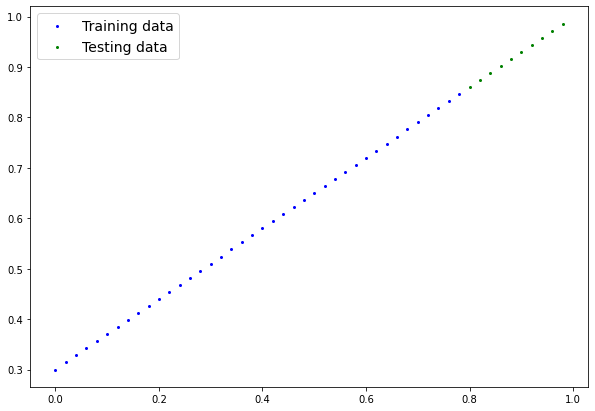

In [6]:
plot_predictions();

In [7]:
from torch import nn

# Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Initialize model parameters
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1,
                                            requires_grad=True,
                                            dtype=torch.float))
        
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [8]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

model_0

LinearRegressionModel()

In [9]:
list(model_0.parameters()) 

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [11]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0.forward(X_test)

y_preds

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

In [12]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

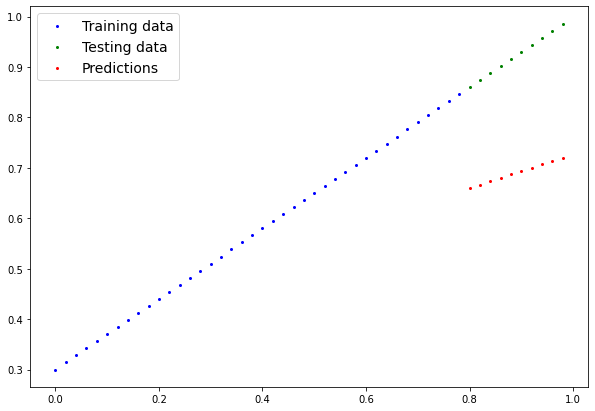

In [13]:
plot_predictions(predictions=y_preds)

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [16]:
def length(l:list) -> int:
    return len(l)

my_list = ['a', 'b', 'c']
length(my_list)

3

In [17]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [18]:
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []


for epoch in range(epochs):

    model_0.train()

    # forward pass
    y_pred = model_0(X_train)

    # Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # optimizer zero grad
    optimizer.zero_grad()

    # perform back propgation
    loss.backward()

    # move to optimized position
    optimizer.step()

    # evaluate model
    model_0.eval()
    with torch.inference_mode(): # turns off gradient tracking
        # forward pass
        test_pred = model_0(X_test)

        # Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}')
        # model state
        print(model_0.state_dict())

    

Epoch: 0 | Test: 0.08169572055339813 | Test loss: 0.22662055492401123
OrderedDict([('weights', tensor([0.3398])), ('bias', tensor([0.3939]))])
Epoch: 10 | Test: 0.06808149069547653 | Test loss: 0.1807345449924469
OrderedDict([('weights', tensor([0.3672])), ('bias', tensor([0.4154]))])
Epoch: 20 | Test: 0.06258393079042435 | Test loss: 0.15627031028270721
OrderedDict([('weights', tensor([0.3891])), ('bias', tensor([0.4204]))])
Epoch: 30 | Test: 0.05879194289445877 | Test loss: 0.1418602615594864
OrderedDict([('weights', tensor([0.4081])), ('bias', tensor([0.4179]))])
Epoch: 40 | Test: 0.05530194193124771 | Test loss: 0.13084018230438232
OrderedDict([('weights', tensor([0.4261])), ('bias', tensor([0.4129]))])
Epoch: 50 | Test: 0.051822252571582794 | Test loss: 0.12050700187683105
OrderedDict([('weights', tensor([0.4439])), ('bias', tensor([0.4074]))])
Epoch: 60 | Test: 0.04838593676686287 | Test loss: 0.11223447322845459
OrderedDict([('weights', tensor([0.4610])), ('bias', tensor([0.4004

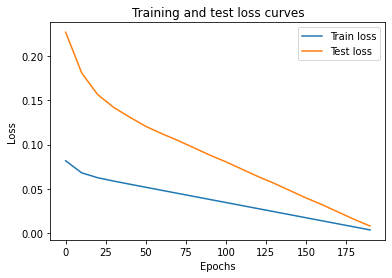

In [19]:
import numpy as np

# Plot the loss curve
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();


In [20]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

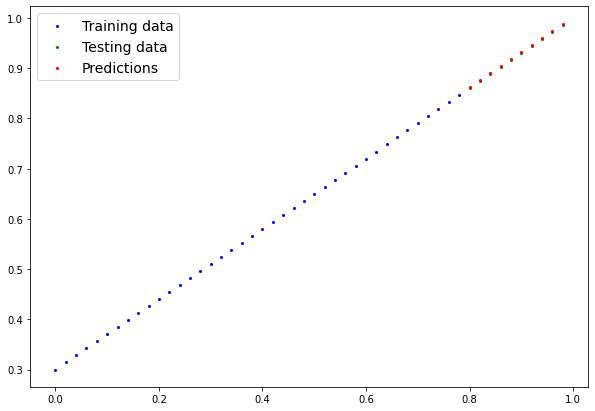

In [22]:

plot_predictions(predictions=y_preds_new)

In [23]:
w, b

(0.7, 0.3)

In [24]:
#Saving model
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [25]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Feb  9 20:17 01_pytorch_workflow_model_0.pth


In [26]:
## Loading model
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.1288])), ('bias', tensor([0.6009]))])

In [27]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [28]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8634],
        [0.8773],
        [0.8913],
        [0.9052],
        [0.9191],
        [0.9330],
        [0.9469],
        [0.9609],
        [0.9748],
        [0.9887]])

In [29]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8634],
        [0.8773],
        [0.8913],
        [0.9052],
        [0.9191],
        [0.9330],
        [0.9469],
        [0.9609],
        [0.9748],
        [0.9887]])

In [30]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Putting it all together

In [31]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# check torch version
torch.__version__

'1.13.1+cu116'

In [32]:
# Create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cpu


In [33]:
# create some data using the linear regression formula y = mx+c
weight = 0.7
bias = 0.3


# Create range of values
start = 0
end = 1
step = 0.02

# Create X and y
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [34]:
# Split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test - X[train_split], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

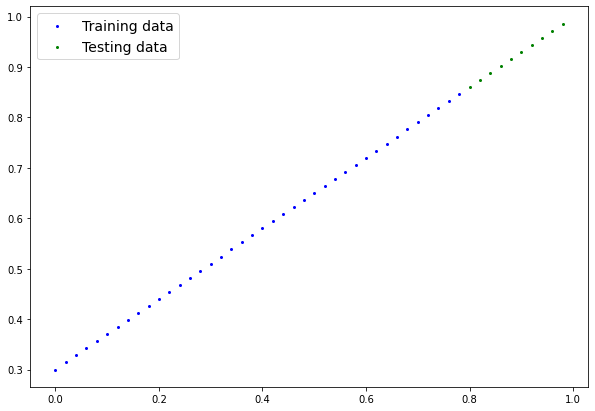

In [35]:
plot_predictions(X_train, y_train,X_test, y_test)

In [36]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # use nn.Linear()
        self.Linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.Linear_layer(x)

# set seed
# torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('Linear_layer.weight', tensor([[-0.4869]])),
              ('Linear_layer.bias', tensor([0.5873]))]))

In [37]:
# Set the model to use target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### Training

In [38]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.01)

epochs = 500

for epoch in range(epochs):
    model_1.train()

    # 1. forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. perform backpropagation
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    # Print out what is happening
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')

Epoch: 0 | Loss: 0.26974982023239136 | Test loss: 0.7627415657043457
Epoch: 10 | Loss: 0.24980036914348602 | Test loss: 0.7036675810813904
Epoch: 20 | Loss: 0.2355562150478363 | Test loss: 0.6545786261558533
Epoch: 30 | Loss: 0.22535471618175507 | Test loss: 0.6137607097625732
Epoch: 40 | Loss: 0.21770060062408447 | Test loss: 0.5800625681877136
Epoch: 50 | Loss: 0.2115832269191742 | Test loss: 0.5516103506088257
Epoch: 60 | Loss: 0.206537127494812 | Test loss: 0.5271192193031311
Epoch: 70 | Loss: 0.20225700736045837 | Test loss: 0.5079809427261353
Epoch: 80 | Loss: 0.19825701415538788 | Test loss: 0.4901808798313141
Epoch: 90 | Loss: 0.194367453455925 | Test loss: 0.4744149148464203
Epoch: 100 | Loss: 0.19087742269039154 | Test loss: 0.4633951187133789
Epoch: 110 | Loss: 0.18738742172718048 | Test loss: 0.4523754119873047
Epoch: 120 | Loss: 0.18389739096164703 | Test loss: 0.4413556456565857
Epoch: 130 | Loss: 0.18040740489959717 | Test loss: 0.4303358495235443
Epoch: 140 | Loss: 0.17

### Making and evaluating predictions

In [39]:
# Turn model in evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[0.7595],
        [0.7682],
        [0.7769],
        [0.7856],
        [0.7943],
        [0.8030],
        [0.8117],
        [0.8204],
        [0.8292],
        [0.8379]])

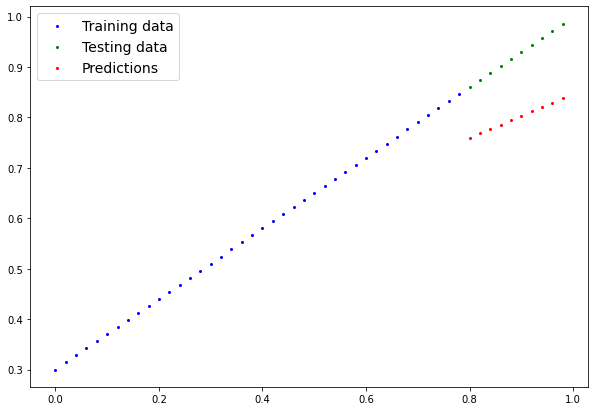

In [40]:
# Check out model predictions
plot_predictions(predictions=y_preds)

In [42]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [45]:
#Load model
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

LinearRegressionModelV2(
  (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [46]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [47]:
loaded_model_1.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.4356]])),
             ('Linear_layer.bias', tensor([0.4110]))])

In [48]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])